In [ ]:
!pip install pydub numpy matplotlib
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Rick Roll.mp3 to Rick Roll.mp3


In [ ]:
import IPython.display as ipd

# Play the resampled audio
ipd.Audio(filename="Rick Roll.mp3",rate=1000)

In [ ]:
from pydub import AudioSegment

# Load the MP3 file
audio = AudioSegment.from_file("Rick Roll.mp3", format="mp3")

# Get the sampling rate
sampling_rate = audio.frame_rate

print(f"The current sampling rate is: {sampling_rate} Hz")

The current sampling rate is: 44100 Hz


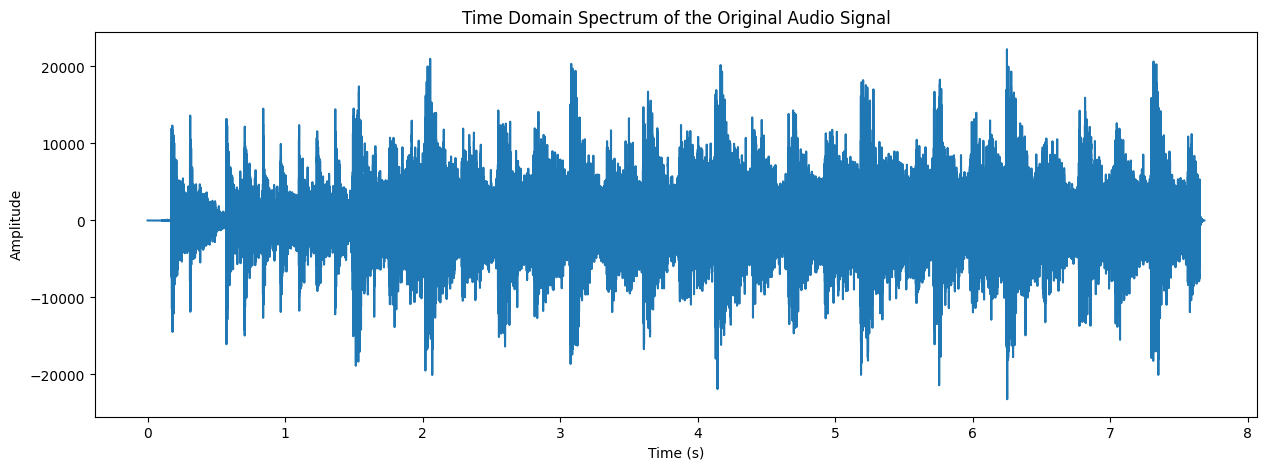

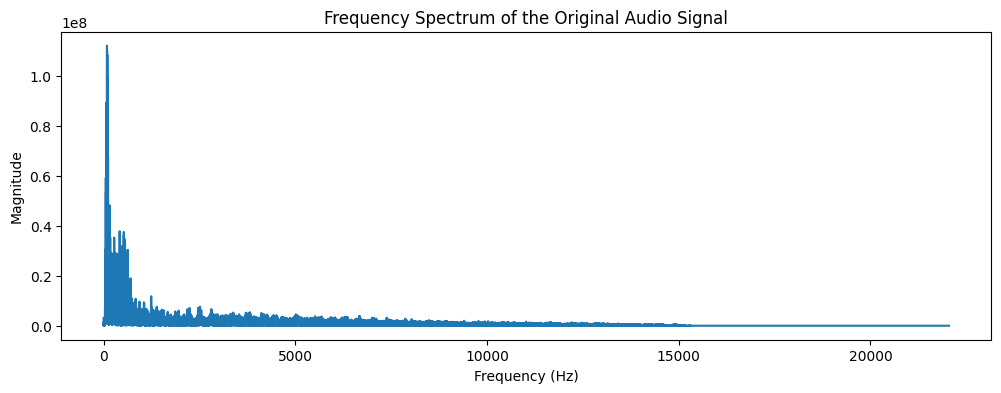

Dominant Frequency: 89.00 Hz
Maximum possible frequency (Nyquist frequency): 22050.00 Hz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to a NumPy array
samples = np.array(audio.get_array_of_samples())

# If stereo, select only one channel
if audio.channels == 2:
    samples = samples[::2]

# Generate the time axis in seconds
time = np.linspace(0, len(samples) / audio.frame_rate, num=len(samples))

# Plot the time domain spectrum of the original audio
plt.figure(figsize=(15, 5))
plt.plot(time, samples)
plt.title("Time Domain Spectrum of the Original Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Compute the FFT
fft_result = np.fft.fft(samples)
frequencies = np.fft.fftfreq(len(fft_result), 1 / audio.frame_rate)

# Get the magnitude of the FFT
magnitude = np.abs(fft_result)

# Plot the frequency spectrum of the original audio
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
plt.title("Frequency Spectrum of the Original Audio Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Find dominant frequency
dominant_index = np.argmax(magnitude[:len(magnitude)//2])
dominant_freq = frequencies[dominant_index]
print(f"Dominant Frequency: {dominant_freq:.2f} Hz")

# Nyquist frequency (maximum representable frequency)
max_possible_freq = audio.frame_rate / 2
print(f"Maximum possible frequency (Nyquist frequency): {max_possible_freq:.2f} Hz")

Dominant Frequency: 89.00 Hz


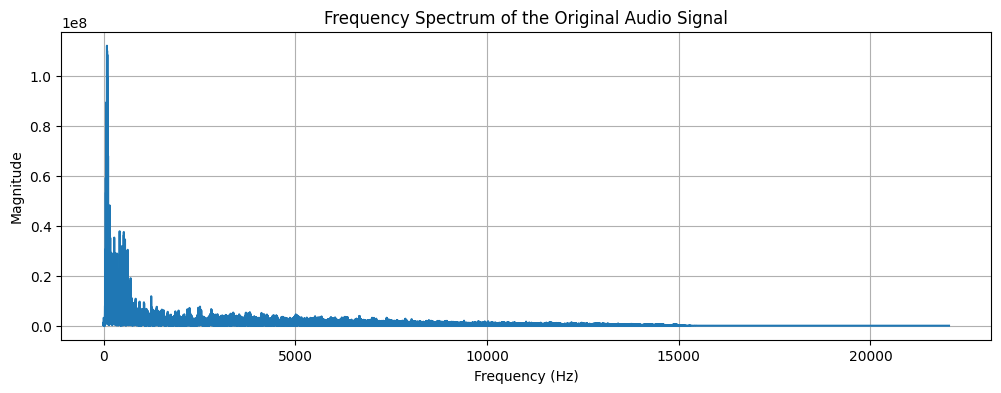

Maximum possible frequency (Nyquist frequency): 22050.00 Hz


In [ ]:
# Compute the FFT
fft_result = np.fft.fft(samples)
frequencies = np.fft.fftfreq(len(fft_result), 1 / audio.frame_rate)
magnitude = np.abs(fft_result)

# Find dominant frequency
dominant_index = np.argmax(magnitude[:len(magnitude)//2])
dominant_freq = frequencies[dominant_index]
print(f"Dominant Frequency: {dominant_freq:.2f} Hz")

# Plot frequency spectrum
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
plt.title("Frequency Spectrum of the Original Audio Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# Nyquist frequency (maximum representable frequency)
max_possible_freq = audio.frame_rate / 2
print(f"Maximum possible frequency (Nyquist frequency): {max_possible_freq:.2f} Hz")



In [ ]:
# Resample the audio
new_sample_rate = 5000  # Set the new sampling rate
resampled_audio = audio.set_frame_rate(new_sample_rate)

# Export the resampled audio to a new file
resampled_audio_path = "resampled_test.mp3"
resampled_audio.export(resampled_audio_path, format="mp3")

print(f"Resampled audio saved as: {resampled_audio_path}")


Resampled audio saved as: resampled_test.mp3


In [ ]:
import IPython.display as ipd

# Play the resampled audio
ipd.Audio(resampled_audio_path)

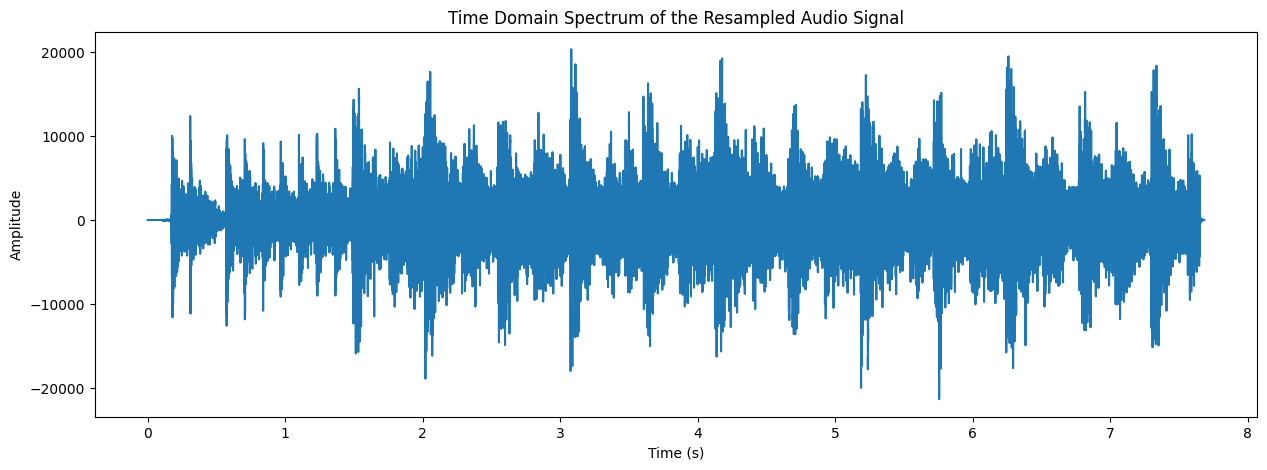

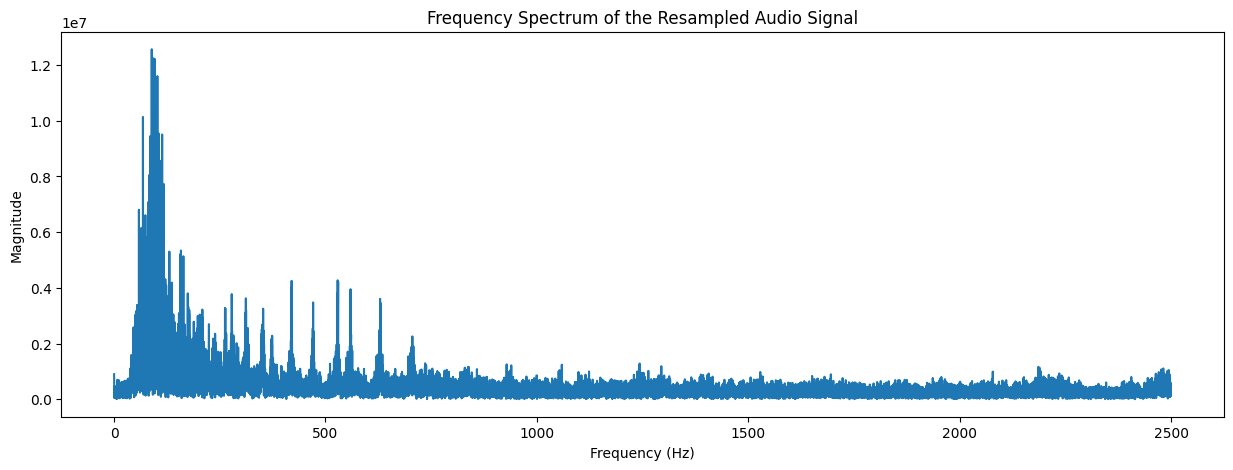

In [ ]:
# Convert to a NumPy array
resampled_samples = np.array(resampled_audio.get_array_of_samples())

# If stereo, select only one channel
if resampled_audio.channels == 2:
    resampled_samples = resampled_samples[::2]

# Generate the time axis in seconds
resampled_time = np.linspace(0, len(resampled_samples) / resampled_audio.frame_rate, num=len(resampled_samples))

# Plot the time domain spectrum of the resampled audio
plt.figure(figsize=(15, 5))
plt.plot(resampled_time, resampled_samples)
plt.title("Time Domain Spectrum of the Resampled Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Compute the FFT
resampled_fft_result = np.fft.fft(resampled_samples)
resampled_frequencies = np.fft.fftfreq(len(resampled_fft_result), 1 / resampled_audio.frame_rate)

# Get the magnitude of the FFT
resampled_magnitude = np.abs(resampled_fft_result)

# Plot the frequency spectrum of the resampled audio
plt.figure(figsize=(15, 5))
plt.plot(resampled_frequencies[:len(resampled_frequencies)//2], resampled_magnitude[:len(resampled_magnitude)//2])
plt.title("Frequency Spectrum of the Resampled Audio Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
